<a href="https://colab.research.google.com/github/Franc-Agostinho/Python-----Projects/blob/main/EDA_Netflix_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Project - EDA

In this project we do some data cleaning and exploratory data anlysis with data from the streaming platform Netflix, under the license: CC0: Public Domain. This dataset is a cleaned version of the original version which can be found [here](https://www.kaggle.com/datasets/shivamb/netflix-shows).

The data consist of contents added to Netflix from 2008 to 2021. The oldest content is as old as 1925 and the newest as 2021.

(--- Finish Intro ---)

The purose of this analysis:

## Data Overview

Let us start by looking into the data:

In [97]:
# Libraries we might require

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
# Data Loading
df = pd.read_csv('/content/drive/MyDrive/Python_Data_Netlifx/netflix1.csv')

# Quick data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [99]:
# Small overview of dataset

df.head(4)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"


**Data Summary**:

This dataset contains 8790 rows and 10 columns. Each column is associated to:


*   show_id: unique identifier of each TV show or movie;
*   type: if the show is either TV Show or Movie;
*   title: the title of the show;
*   director: director(s) of the show, if any;
*   country: country of origin of the show, if any;
*   date_added: date in which the show was added to Netflix, if existing;
*   release_year: year in which the show was released;
*   rating: Audience rating (for instance, PG-13, TV-MA)
*   duration: duration of the show, in minutes for movies and seasons for TV shows;
*   listed_in: genre(s) in which the show is included;




## Data Cleaning

 This dataset is pretty much ready for analysis as this data has already been preprocessed.

 Nontheless, we still address the following topics:

 1. Presence of duplicates in the dataset;
 2. Presence of missing values;
 3. Standardize the data;
 4. Remove and Add columns;


### 1 --> Duplicate Rows

We check if there are any duplicate items in our data set. If so, we can drop the repeated rows. As the next snippet shows, however, there are no duplicate items in our dataset.

In [100]:
# Checking for duplicated rows
print(df.duplicated().sum())

0


### 2 --> Missing Values

In [101]:
# Checking for Missing Values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


### 3 --> Standardize data

Our first task is to replace the column 'listed_in' by genres

In [102]:
# Renaming columns

df.rename(columns={'listed_in':'genres'}, inplace = True)

The parameter **inplace = True** makes sure we replace directly in our dataframe df. If false it will create a new data frame object with the changes.

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   genres        8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


Our seccond task in making data uniform is to change dates into date-type format

In [104]:
# changing to dates

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   genres        8790 non-null   object        
 10  year_added    8790 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(8)
memory usage: 721.2+ KB


The rest of the data is already in a standardize way, so we leave it as is.

### 4 --> Removing and Adding Columns

The column 'show_id' is useful in preprocessing the data, but it will not be useful for our analysis, for that reason, we start by dropping it.

In [106]:
df.drop('show_id', axis = 1, inplace = True)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      8790 non-null   object        
 3   country       8790 non-null   object        
 4   date_added    8790 non-null   datetime64[ns]
 5   release_year  8790 non-null   int64         
 6   rating        8790 non-null   object        
 7   duration      8790 non-null   object        
 8   genres        8790 non-null   object        
 9   year_added    8790 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(7)
memory usage: 652.5+ KB


In the column 'duration', we check the distinct items present in that column

In [108]:
df['duration'].unique()

array(['90 min', '1 Season', '91 min', '125 min', '9 Seasons', '104 min',
       '87 min', '127 min', '76 min', '71 min', '131 min', '39 min',
       '36 min', '34 min', '35 min', '46 min', '67 min', '65 min',
       '61 min', '166 min', '103 min', '97 min', '106 min', '2 Seasons',
       '4 Seasons', '147 min', '94 min', '161 min', '111 min', '110 min',
       '105 min', '96 min', '124 min', '116 min', '98 min', '115 min',
       '122 min', '55 min', '99 min', '88 min', '100 min', '6 Seasons',
       '3 Seasons', '23 min', '102 min', '93 min', '95 min', '85 min',
       '83 min', '182 min', '5 Seasons', '92 min', '84 min', '48 min',
       '145 min', '119 min', '80 min', '128 min', '143 min', '273 min',
       '117 min', '114 min', '118 min', '108 min', '37 min', '121 min',
       '63 min', '142 min', '113 min', '154 min', '120 min', '82 min',
       '109 min', '101 min', '86 min', '77 min', '229 min', '15 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '44 min',
  

As we can see, we have two types durations in minutes, and in seasons. Minutes are associated with movies and seasons with TV shows.

Our next is to create two columns one that stores the duration of movies in minutes and the other the duration of TV shows in seasons. To attain this goal, we are going to create a function, whose task is to do this splitting and we the apply the function to our data frame.

In [109]:
# Splitting function to obtain movie minutes or the number of TV shows' seasons

def split_duration(row):
  duration_number = row['duration'].split()[0]
  duration_type = row['duration'].split()[1]
  if duration_type == 'Seasons' or duration_type == 'Season':
    return pd.NA, int(duration_number)
  else:
    return int(duration_number), pd.NA



Given how the data is clean and that there are no missing values in this column, the code above should work to produce the columns 'movie_duration_minutes' and 'tvshow_duration_seasons' (in this oder).

We apply the function now to split the data.

In [110]:
df[['movie_duration_mins', 'tvshow_duration_seasons']] = df.apply(split_duration, axis=1, result_type='expand')

1. apply applies the function split_duration
2. axis = 1 tells python to apply the split_duration function row-wise to the whole dataframe
3. split_duration has two outputs for each row. The result_type = 'Expand' tells python to store those outputs into separate columns. These columns are the ones described in  df[['movie_duration_mins', 'tvshow_duration_seasons']]

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   type                     8790 non-null   object        
 1   title                    8790 non-null   object        
 2   director                 8790 non-null   object        
 3   country                  8790 non-null   object        
 4   date_added               8790 non-null   datetime64[ns]
 5   release_year             8790 non-null   int64         
 6   rating                   8790 non-null   object        
 7   duration                 8790 non-null   object        
 8   genres                   8790 non-null   object        
 9   year_added               8790 non-null   int32         
 10  movie_duration_mins      6126 non-null   object        
 11  tvshow_duration_seasons  2664 non-null   object        
dtypes: datetime64[ns](1), int32(1), in

To finish, we cast these new columns into integers and we drop the duration column

In [112]:
# dropping unnecessary 'duration' column
df.drop(columns = ['duration'], inplace = True)

In [113]:
# Changing the data type to integers

df['movie_duration_mins'] = df['movie_duration_mins'].astype('Int64')
df['tvshow_duration_seasons'] = df['tvshow_duration_seasons'].astype('Int64')

This is the data frame at the end of this step.

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   type                     8790 non-null   object        
 1   title                    8790 non-null   object        
 2   director                 8790 non-null   object        
 3   country                  8790 non-null   object        
 4   date_added               8790 non-null   datetime64[ns]
 5   release_year             8790 non-null   int64         
 6   rating                   8790 non-null   object        
 7   genres                   8790 non-null   object        
 8   year_added               8790 non-null   int32         
 9   movie_duration_mins      6126 non-null   Int64         
 10  tvshow_duration_seasons  2664 non-null   Int64         
dtypes: Int64(2), datetime64[ns](1), int32(1), int64(1), object(6)
memory usage: 738.4+ KB


## Exploratory Data Analysis

### 1 → Distribution of type on Netflix: 🥧 Pie Plot

It is perhaps interesting to see if there are more movies or Tv shows on Neflix as up until 2021.

In [115]:
# Series description
df['type'].describe()

,type
count,8790
unique,2
top,Movie
freq,6126


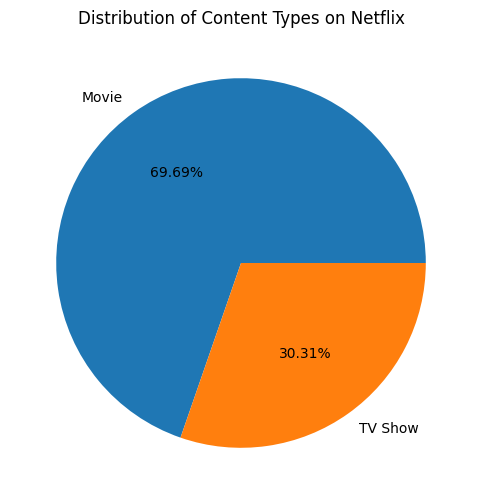

In [116]:
df['type'].value_counts().plot.pie(autopct='%.2f%%', figsize=(6,6))
plt.title('Distribution of Content Types on Netflix')
plt.ylabel('') # Remove the default y-label for pie chart
plt.show()

Conclusion: There are more movies than Tv Shows on Netlfix. Approximatly, 69.69% of the content of Neflix in 2021 was made of Movies whilst 30.31% consisted of TV shows.

### 2 → Time Spans

#### 2.1 → Oldest and Most recent

In [117]:
## oldest show to the most recent

df['release_year'].aggregate(['min','max'])


,release_year
min,1925
max,2021


#### 2.2 → Oldest and Most recent by Movies and TV Shows

In [118]:
# Oldest and most recent Movie

movies_df = df[df['type'] == 'Movie']
movies_df['release_year'].aggregate(['min','max'])


,release_year
min,1942
max,2021


Of all the movies released between 1942 and 2021, it might be interesting to know, which one(s) was (were) first added to Netflix.

In [119]:
# title and date added of the oldest movies

df[(df['type'] == 'Movie') & (df['release_year'] == 1942)][['title' , 'date_added']]

,title,date_added
5698,Prelude to War,2017-03-31
6037,The Battle of Midway,2017-03-31


In [120]:
# title and date added of the most recent movies added

movies_2021 = df[(df['type'] == 'Movie') & (df['release_year'] == 2021)][['title' , 'date_added']]
movies_2021 = movies_2021.sort_values(by = 'date_added')

last_added_date = movies_2021['date_added'].iloc[-1]
movies_2021_last = movies_2021[movies_2021['date_added'] == last_added_date]

movies_2021_last

,title,date_added
23,My Little Pony: A New Generation,2021-09-24
6,The Starling,2021-09-24


Proceeding similarlly for TV shows:

In [121]:
# Oldest and most recent TV Show

TV_df = df[df['type'] == 'TV Show']
TV_df['release_year'].aggregate(['min','max'])

,release_year
min,1925
max,2021


In [122]:
# title and date added of the oldest TV show

df[(df['type'] == 'TV Show') & (df['release_year'] == 1925)][['title' , 'date_added']]

,title,date_added
421,Pioneers: First Women Filmmakers*,2018-12-30


In [123]:
# title and date added of the most recent TV shows added

TV_2021= df[(df['type'] == 'TV Show') & (df['release_year'] == 2021)][['title' , 'date_added']]
TV_2021 = TV_2021.sort_values(by = 'date_added')

last_added_date = TV_2021['date_added'].iloc[-1]
TV_2021_last = TV_2021[TV_2021['date_added'] == last_added_date]

TV_2021_last

,title,date_added
6572,Kota Factory,2021-09-24
6570,Blood & Water,2021-09-24
17,Jailbirds New Orleans,2021-09-24
5,The Great British Baking Show,2021-09-24
2,Midnight Mass,2021-09-24
6586,"Vendetta: Truth, Lies and The Mafia",2021-09-24
1,Ganglands,2021-09-24


### 3 → Concerning Directors

#### 3.1 → Top 10 Directors 📊 Bar-chart

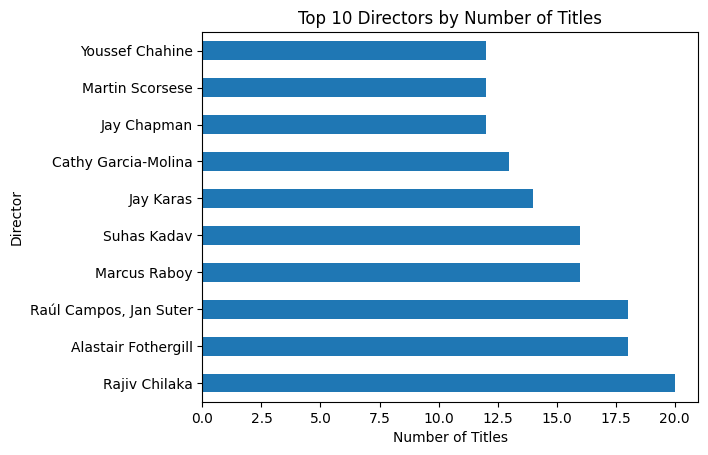

In [124]:

# getting the counts per director
director_counts = df['director'].value_counts()

# removing the cases where df['director'] == 'Not Given'

relevant_director_counts = director_counts.iloc[1:].head(10)

# plotting
relevant_director_counts.plot.barh()
plt.title('Top 10 Directors by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

#### 3.2 → Top 3  TV Shows Directors 📊 Bar-chart

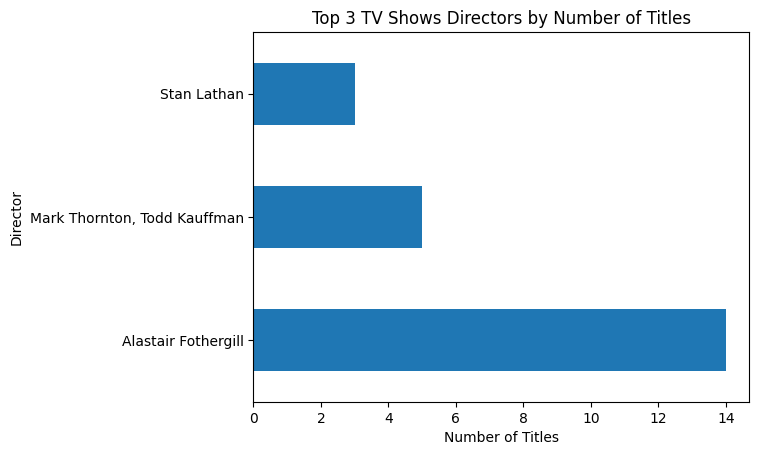

In [125]:
# restricting to TV Shows

TV_df = df[df['type'] == 'TV Show']

# getting the counts per director
director_counts = TV_df['director'].value_counts()

# removing the cases where df['director'] == 'Not Given'

relevant_director_counts = director_counts.iloc[1:].head(3)

# plotting using pandas
relevant_director_counts.plot.barh()
plt.title('Top 3 TV Shows Directors by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

#### 3.3 → Top 3 Movie Directors 📊 Bar-chart

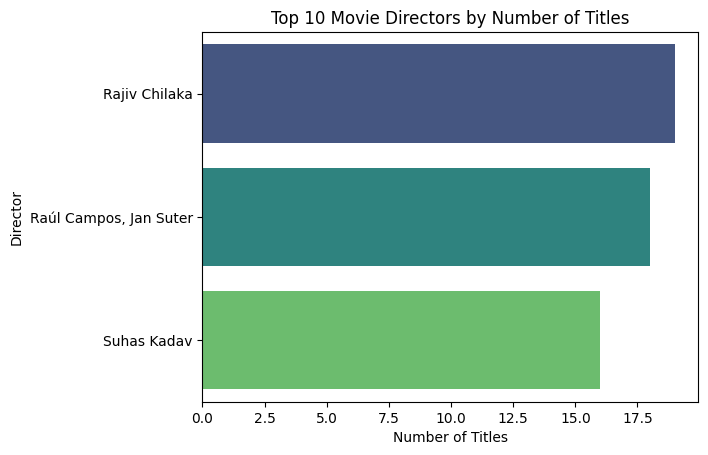

In [126]:
# restricting to TV Shows

TV_df = df[df['type'] == 'Movie']

# getting the counts per director
director_counts = TV_df['director'].value_counts()

# removing the cases where df['director'] == 'Not Given'

relevant_director_counts = director_counts.iloc[1:].head(3)

# plotting using seaborn
sns.barplot(x = relevant_director_counts, y = relevant_director_counts.index ,palette = 'viridis' )
plt.title('Top 10 Movie Directors by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

### 4 → Country Insights

#### 4.1 → Top Country per Number of Titles

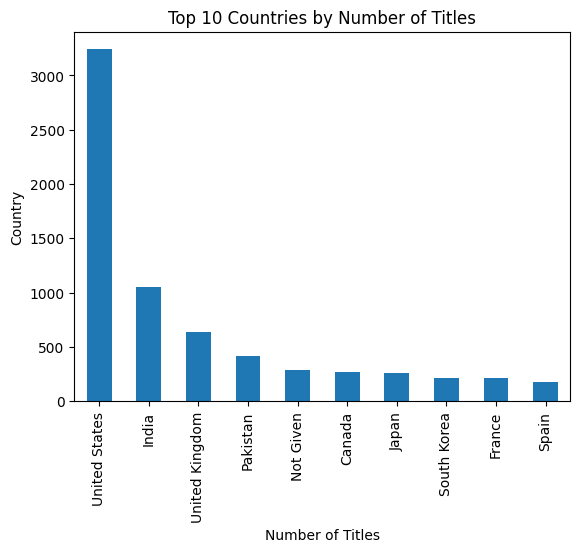

In [127]:
#counting titles per country

country_counts = df['country'].value_counts().head(10)

#plotting

country_counts.plot.bar()
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

#### 4.2 → Genre Distribution in the top 3 countries with more titles 🥧 pie-plots

As seen before, the top 3 countries are US, India and UK.

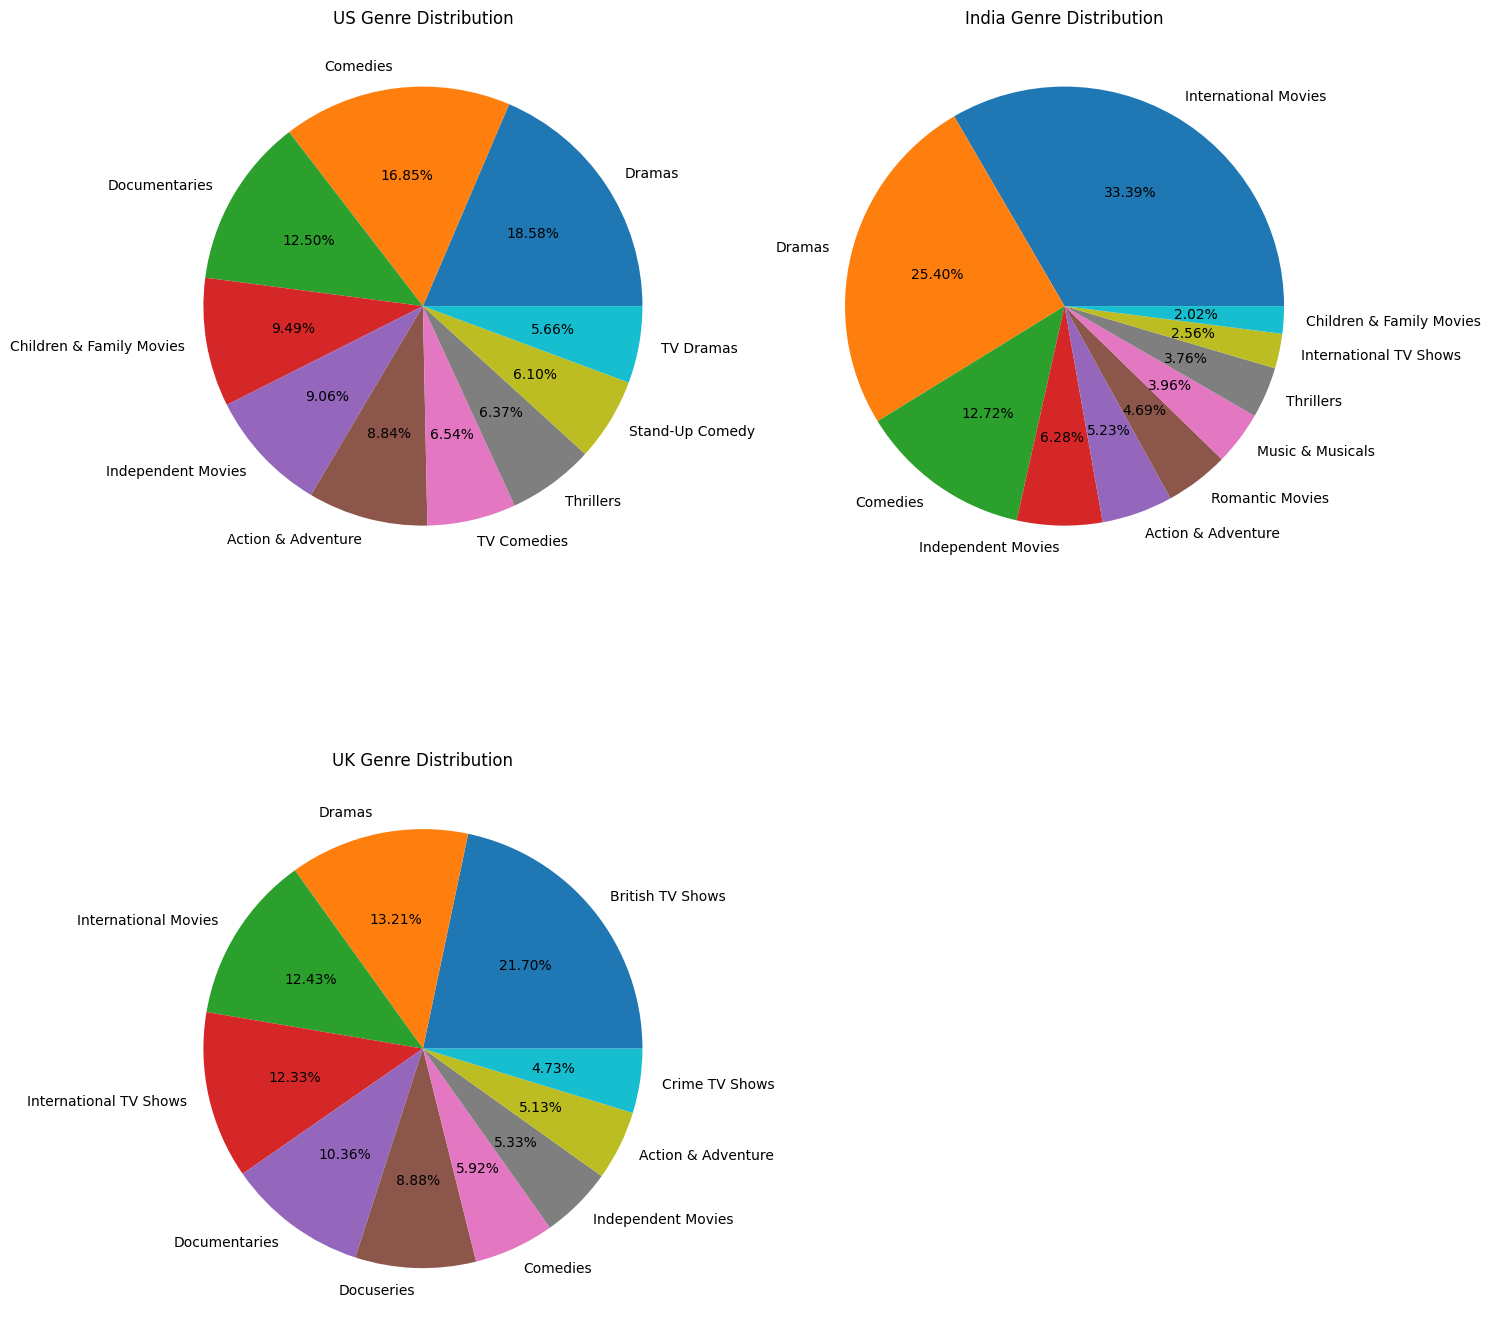

In [128]:

# movie_genres = df[df['type'] == 'Movie']
# movie_genres = movie_genres.assign(genre=movie_genres['genres'].str.split(', ')).explode('genre')
# movie_genres.head()

# US
US_genres_df = df[df['country'] == 'United States']
US_genres_df = US_genres_df.assign(genre = US_genres_df['genres'].str.split(', ')).explode('genre')
US_genres_df['genre'].value_counts()

# India
India_genres_df = df[df['country'] == 'India']
India_genres_df = India_genres_df.assign(genre = India_genres_df['genres'].str.split(', ')).explode('genre')
India_genres_df['genre'].value_counts()
# UK
UK_genres_df = df[df['country'] == 'United Kingdom']
UK_genres_df = UK_genres_df.assign(genre = UK_genres_df['genres'].str.split(', ')).explode('genre')
UK_genres_df['genre'].value_counts()

#plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

US_genres_df['genre'].value_counts().head(10).plot.pie(autopct='%.2f%%', ax=axes[0, 0])
axes[0, 0].set_title('US Genre Distribution')
axes[0, 0].set_ylabel('')

India_genres_df['genre'].value_counts().head(10).plot.pie(autopct='%.2f%%', ax=axes[0, 1])
axes[0, 1].set_title('India Genre Distribution')
axes[0, 1].set_ylabel('')

UK_genres_df['genre'].value_counts().head(10).plot.pie(autopct='%.2f%%', ax=axes[1, 0])
axes[1, 0].set_title('UK Genre Distribution')
axes[1, 0].set_ylabel('')

# Hide the unused subplot
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()


### 5 → Distribution of duration of Movies and TV Shows

#### 5.1 → Movies 📊 - Histogram and KDE with Seaborn

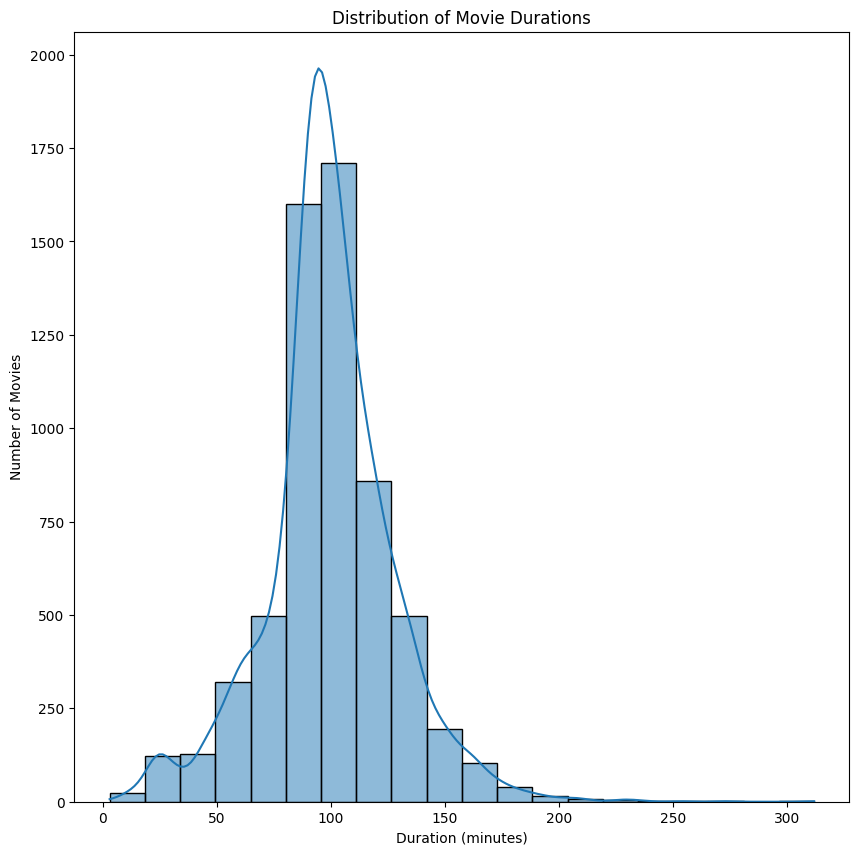

In [129]:
plt.figure(figsize = (10, 10))
sns.histplot(df['movie_duration_mins'],bins=20,kde = True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

#### 5.2 → TV Shows 📊 - Histogram and KDE with Seaborn

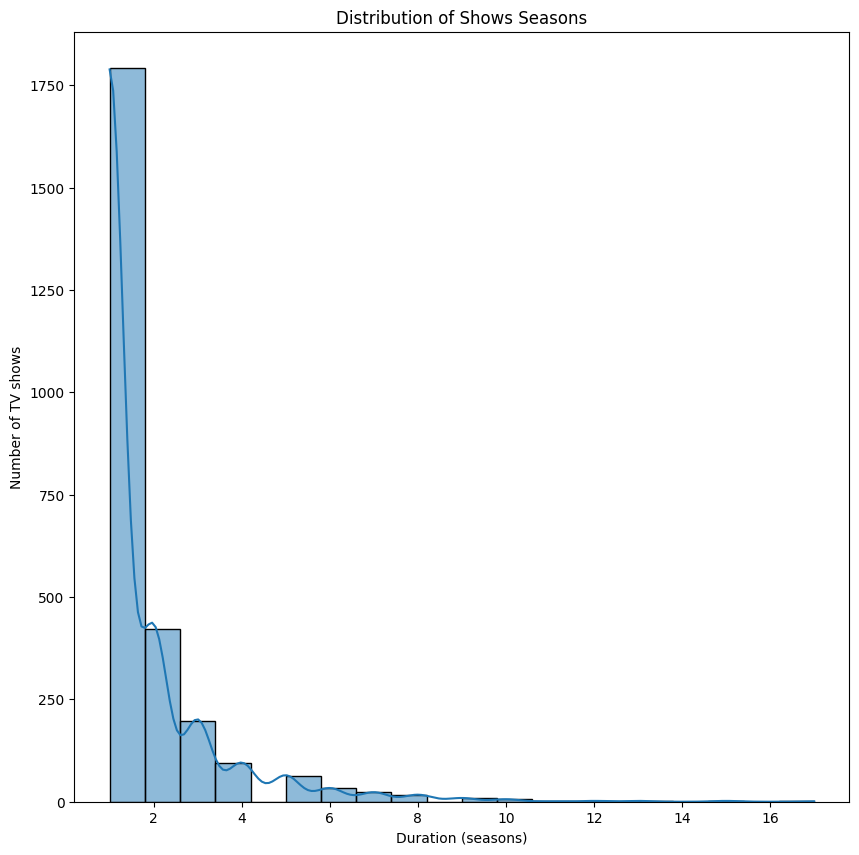

In [130]:
plt.figure(figsize = (10, 10))
sns.histplot(df['tvshow_duration_seasons'],bins=20,kde = True)
plt.title('Distribution of Shows Seasons')
plt.xlabel('Duration (seasons)')
plt.ylabel('Number of TV shows')
plt.show()

### 6 → Trends

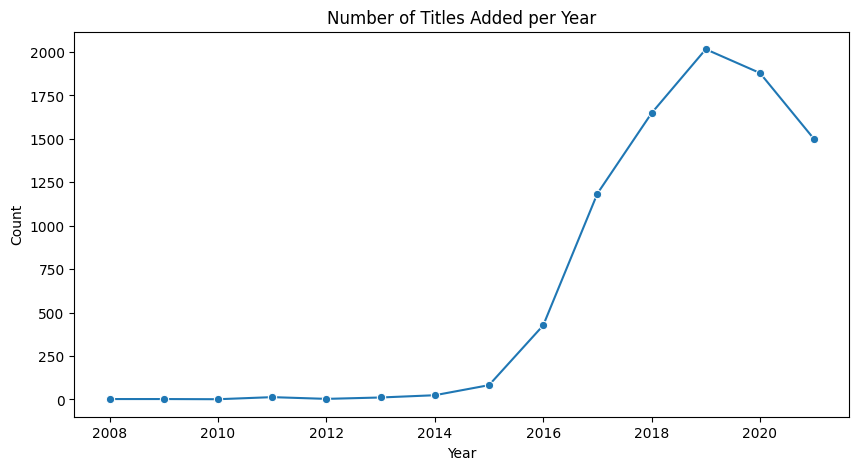

In [131]:
additions_per_year = df['year_added'].value_counts().sort_index()

#plotting
plt.figure(figsize=(10, 5))
sns.lineplot(x=additions_per_year.index, y=additions_per_year.values, marker='o')
plt.title('Number of Titles Added per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

<Figure size 1000x500 with 0 Axes>

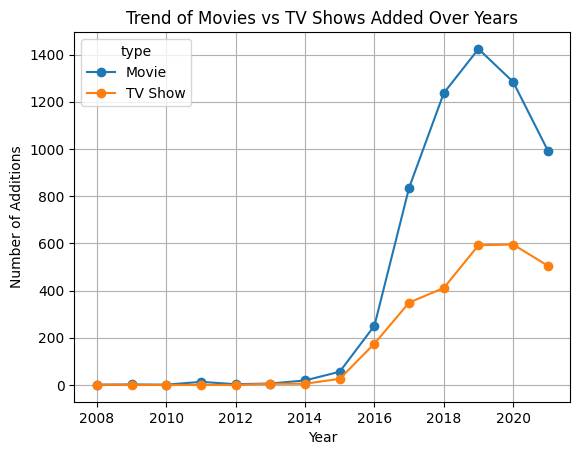

In [132]:
trend = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

#plotting
plt.figure(figsize=(10, 5))
trend.plot(kind='line', marker='o')
plt.title('Trend of Movies vs TV Shows Added Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Additions')
plt.grid(True)
plt.show()

In [133]:
trend.corr()

type,Movie,TV Show
type,,
Movie,1.000000,0.982453
TV Show,0.982453,1.000000


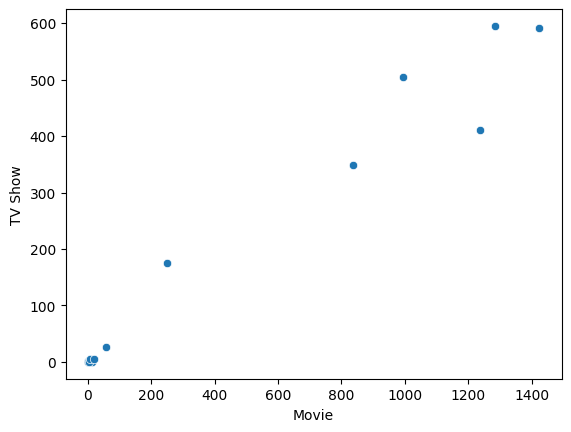

In [134]:
sns.scatterplot(data = trend, x = 'Movie', y = 'TV Show')
plt.show()

In [135]:
# linear regression

from sklearn.linear_model import LinearRegression

 # movies the independent variable
 # Tv Shows the dependent variable

x=trend['Movie'].values.reshape(-1,1)
y=trend['TV Show'].values.reshape(-1,1)

model = LinearRegression()
# Train the model
model.fit(x, y)

# Get the coefficients (slope)
coefficient = model.coef_[0,0]

# Get the intercept
intercept = model.intercept_[0]

# Evaluate the model
r2_score = model.score(x, y)


#Information print:
print(f"The Linear Regression equation is: y= {coefficient} * x + {intercept}. The regression has an R-squared value: {r2_score}")


The Linear Regression equation is: y= 0.4180845120092869 * x + 7.343877102222024. The regression has an R-squared value: 0.9652140870559992
